# Assignment 37

## A heuristic method for checking the Baker-Campbell-Hausdorff formula

In [1]:
# the method .removeO( ) will remove the order from a series, leaving us with just a finite polynomial expression
# we can then evaluate that expression

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import black
import jupyter_black

# from sympy.physics.quantum import Commutator
from sympy import exp, sin, eye, ones, zeros, simplify
from sympy import diff, series, integrate, Function, Matrix, Rational, Symbol
from sympy.abc import c, g, x

sns.set_theme(style="darkgrid")

jupyter_black.load(
    lab=False,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)


def create_matrices(m, ranlim, num):
    return [Matrix(np.random.randint(-ranlim, ranlim, size=(m, m))) for n in range(num)]


def taylor_series(fn, var, ctr: float, ordr: int):
    """
    fn: sympy expression
            representation of a fn
    var: sympy symbol
            argument to fn
    ctr: float
            point about which series is expanded
    ordr: int
            order of the series expansion
    """
    return series(fn(var), var, ctr, ordr)


def evaluate_series(srs, var, val: float):
    """
    srs: sympy series
            representation of a series
    var: sympy symbol
            argument to series
    val: float
            value at which to evaluate series
    """
    return srs.removeO().subs(var, val).evalf()


def taylor_series_matrix(fn, X, ctr: float, ordr: int):
    rows, cols = np.shape(X)
    X_out = zeros(rows)
    for r in range(rows):
        for c in range(cols):
            var = X[r, c]
            X_out[r, c] = taylor_series(fn, var, ctr, ordr)
    return X_out


def evaluate_series_matrix(X, var, val: float):
    rows, cols = np.shape(X)
    X_out = zeros(rows)
    for r in range(rows):
        for c in range(cols):
            srs = X[r, c]
            X_out[r, c] = evaluate_series(srs, var, val)
    return X_out


def Commutator(mtrxA, mtrxB):
    return mtrxA * mtrxB - mtrxB * mtrxA


def BCH(m1, m2, t):
    X = t * (m1 + m2) + (1.0 / 24.0) * (t**3) * (
        2 * Commutator(m1, Commutator(m1, m2)) - Commutator(m2, Commutator(m2, m1))
    )
    return taylor_series_matrix(exp, X, 0, 5)


def BCH2(m1, m2, t):
    X = (
        t * (m1 + m2)
        + (1.0 / 2.0) * (t**2) * Commutator(m1, m2)
        + (1.0 / 12.0)
        * (t**3)
        * (Commutator(m1, Commutator(m1, m2)) - Commutator(m2, Commutator(m2, m1)))
        - (1.0 / 24.0) * (t**4) * Commutator(m1, Commutator(m2, Commutator(m2, m1)))
    )
    return taylor_series_matrix(exp, X, 0, 5)


def exponentiate_matrix(X, n=5):
    mtrxs = [Rational(1, np.math.factorial(i)) * X.pow(i) for i in range(n + 1)]
    _, dim = np.shape(X)
    eX = sp.zeros(dim)
    for m in mtrxs:
        eX += m
    return eX


A, B = create_matrices(3, 10, 2)
C, D = create_matrices(5, 10, 2)
E, F = create_matrices(8, 10, 2)

t = sp.Symbol("t")


def compute_all(m1, m2):
    m1m2 = exponentiate_matrix(
        (t * Rational(1, 2) * m2) * (t * m1) * (t * Rational(1, 2) * m2), n=5
    )
    bch_m1m2 = BCH(m1, m2, t)
    bch2_m1m2 = BCH2(m1, m2, t)
    return m1m2, bch_m1m2, bch2_m1m2


AB, bchAB, bch2AB = compute_all(A, B)

CD, bchCD, bch2CD = compute_all(C, D)

EF, bchEF, bch2EF = compute_all(E, F)

DEBUG:jupyter_black:config: {'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

In [2]:
sp.simplify(AB - bchAB)

Matrix([
[       14.0*t - 98.0*t**2 + 409.916666666667*t**3 - 1654.33333333333*t**4 + O(t**5),     -1.0 - 3.0*t - 4.5*t**2 + 36.1666666666667*t**3 - 92.875*t**4 + O(t**5),                                                    -1.0 - 3.0*t - 4.5*t**2 - 45.0*t**3 - 33.375*t**4 + O(t**5)],
[  -1.0 + 4.0*t - 8.0*t**2 - 49.9166666666667*t**3 - 62.3333333333333*t**4 + O(t**5), -4.0*t - 8.0*t**2 + 24.5416666666667*t**3 - 123.833333333333*t**4 + O(t**5), -1 + 5.95833333333333*t**3 - 166.823784722222*t**6 + 26496.7627917631*t**9 - 708555.011875608*t**12 + O(t**15)],
[-1.0 + 10.0*t - 50.0*t**2 + 61.4166666666667*t**3 - 634.166666666667*t**4 + O(t**5),   -1.0 - 9.0*t - 40.5*t**2 - 90.2083333333333*t**3 - 1148.25*t**4 + O(t**5),                                   11.0*t - 60.5*t**2 + 179.541666666667*t**3 - 879.083333333333*t**4 + O(t**5)]])

In [3]:
sp.simplify(AB - bch2AB)

Matrix([
[       14.0*t - 97.0*t**2 + 396.583333333333*t**3 - 1777.41666666667*t**4 + O(t**5),                       -1.0 - 3.0*t + 24.0*t**2 + 83.25*t**3 - 398.125*t**4 + O(t**5),                                                                                                    -1.0 - 3.0*t - 6.0*t**2 - 22.75*t**3 + 258.875*t**4 + O(t**5)],
[            -1.0 + 4.0*t - 9.0*t**2 - 18.6666666666667*t**3 - 196.75*t**4 + O(t**5),                   -4.0*t - 13.5*t**2 - 30.4166666666667*t**3 - 291.25*t**4 + O(t**5), -1.0 + 28.5*t**2 + 26.5*t**3 - 204.416666666667*t**4 - 2073.375*t**5 - 3340.75*t**6 + 14871.3125*t**7 + 109505.100694444*t**8 + 204485.494791667*t**9 + O(t**10)],
[-1.0 + 10.0*t - 73.0*t**2 + 286.833333333333*t**3 - 2069.91666666667*t**4 + O(t**5), -1.0 - 9.0*t - 4.00000000000001*t**2 + 193.25*t**3 - 561.458333333334*t**4 + O(t**5),                                                                                     11.0*t - 56.0*t**2 + 162.333333333333*t**3 - 784.458333333333*t**

In [4]:
sp.simplify(CD - bchCD)

Matrix([
[                                  14.0*t - 98.0*t**2 + 688.166666666667*t**3 - 2630.83333333333*t**4 + O(t**5),                             -1.0 + 8.0*t - 32.0*t**2 + 179.083333333333*t**3 - 1472.66666666667*t**4 + O(t**5),    -1.0 - 1.0*t - 0.5*t**2 + 173.166666666667*t**3 + 309.041666666667*t**4 + O(t**5), -1.0 + 1.0*t - 0.5*t**2 - 205.958333333333*t**3 + 301.833333333333*t**4 + O(t**5),          -1.0 - 9.0*t - 40.5*t**2 - 81.6666666666667*t**3 + 854.625*t**4 + O(t**5)],
[                                                -1.0 - 9.0*t - 40.5*t**2 - 144.5*t**3 - 844.875*t**4 + O(t**5),                                    5.0*t - 12.5*t**2 + 38.4583333333333*t**3 - 275.416666666667*t**4 + O(t**5),           -1.0 + 15.0*t - 112.5*t**2 + 240.041666666667*t**3 - 4157.5*t**4 + O(t**5),         -1.0 + 12.0*t - 72.0*t**2 + 172.791666666667*t**3 - 3063.5*t**4 + O(t**5), -1.0 - 8.0*t - 32.0*t**2 - 285.708333333333*t**3 - 69.6666666666667*t**4 + O(t**5)],
[                                

In [5]:
sp.simplify(CD - bch2CD)

Matrix([
[                                                                                            14.0*t - 87.5*t**2 + 441.25*t**3 + 220.791666666668*t**4 + O(t**5),                                                                                               -1.0 + 8.0*t - 46.5*t**2 + 273.25*t**3 - 2488.33333333333*t**4 + O(t**5),           -1.0 - 1.0*t - 102.5*t**2 + 59.4166666666666*t**3 - 4614.75*t**4 + O(t**5),           -1.0 + 1.0*t + 80.5*t**2 - 393.083333333333*t**3 - 3282.75*t**4 + O(t**5),             -1.0 - 9.0*t - 36.5*t**2 - 49.25*t**3 - 466.833333333333*t**4 + O(t**5)],
[                                                                                                 -1.0 - 9.0*t - 62.0*t**2 - 371.0*t**3 - 1844.5*t**4 + O(t**5),                                                                                             5.0*t + 8.5*t**2 - 76.3333333333333*t**3 + 959.083333333333*t**4 + O(t**5),                         -1.0 + 15.0*t - 94.5*t**2 + 8.75*t**3 - 537.0*t**4 +

In [6]:
sp.simplify(EF - bchEF)

Matrix([
[-227.125*t**3 - 723284.3203125*t**6 - 104998346.696289*t**9 + 12143668450.4591*t**12 + O(t**15),            -1.0 - 3.0*t - 4.5*t**2 + 308.333333333333*t**3 + 938.125*t**4 + O(t**5), -1.0 + 17.0*t - 144.5*t**2 + 403.833333333333*t**3 - 275.541666666666*t**4 + O(t**5), -1.0 - 8.0*t - 32.0*t**2 - 304.458333333333*t**3 - 1179.66666666667*t**4 + O(t**5),                   -1.0 - 16.0*t - 128.0*t**2 - 805.125*t**3 - 14930.0*t**4 + O(t**5),                       -1.0 - 8.0*t - 32.0*t**2 - 714.25*t**3 + 222.0*t**4 + O(t**5),          -1.0 - 3.0*t - 4.5*t**2 - 273.416666666667*t**3 - 1648.625*t**4 + O(t**5),           -1.0 + 3.0*t - 4.5*t**2 - 171.958333333333*t**3 + 1165.75*t**4 + O(t**5)],
[                               -1.0 + 11.0*t - 60.5*t**2 + 384.0*t**3 + 3592.875*t**4 + O(t**5),                  3.0*t - 4.5*t**2 + 108.333333333333*t**3 - 1048.375*t**4 + O(t**5),   -1.0 - 7.0*t - 24.5*t**2 - 544.666666666667*t**3 - 2938.54166666667*t**4 + O(t**5),           -1.0 - 9.0*t - 40.5

In [7]:
sp.simplify(EF - bch2EF)

Matrix([
[60.0*t**2 - 467.5*t**3 + 3254.91666666667*t**4 + 60045.0*t**5 - 1202244.53125*t**6 + 3257357.85416667*t**7 + 25827775.6215278*t**8 - 466264745.820313*t**9 + O(t**10),    -1.0 - 3.0*t - 6.0*t**2 + 565.583333333333*t**3 - 4081.20833333333*t**4 + O(t**5),        -1.0 + 17.0*t - 105.5*t**2 - 206.833333333333*t**3 + 3134.625*t**4 + O(t**5),   -1.0 - 8.0*t - 15.0*t**2 - 86.4166666666666*t**3 - 2488.54166666667*t**4 + O(t**5),          -1.0 - 16.0*t - 61.5*t**2 + 2.91666666666652*t**3 - 8804.25*t**4 + O(t**5), -1.0 - 8.0*t - 157.0*t**2 - 1433.41666666667*t**3 - 8519.66666666667*t**4 + O(t**5),           -1.0 - 3.0*t + 102.0*t**2 - 54.3333333333333*t**3 - 5005.0*t**4 + O(t**5),          -1.0 + 3.0*t + 49.0*t**2 - 267.166666666667*t**3 - 1274.125*t**4 + O(t**5)],
[                                                                                            -1.0 + 11.0*t - 94.5*t**2 + 538.583333333333*t**3 + 7037.0*t**4 + O(t**5),                     3.0*t - 56.5*t**2 + 376.0*t**3 - 3946

# Assignment 38
## Trotter Product Formula Convergence

In [77]:
def random_matrix(ordr, num: int):
    mtrxs = [None] * num
    for n in range(num):
        mtrx = zeros(ordr)
        for r in range(ordr):
            for c in range(ordr):
                mtrx[r, c] = np.random.normal(0, 1)
        mtrxs[n] = mtrx
    return mtrxs


def symmetrize(mtrx):
    return Rational(1, 2) * (mtrx + sp.transpose(mtrx)), Rational(1, 2) * (
        mtrx - sp.transpose(mtrx)
    )


def mtrx_prod1(sym1, skw1, sym2, skw2, n: int):
    mtrx1 = sym1 + skw2
    mtrx2 = sym2 + skw2
    return (exp(Rational(1, n) * mtrx1) * exp(Rational(1, n) * mtrx2)).pow(n)


def mtrx_prod2(sym1, skw1, sym2, skw2, n: int):
    mtrx1 = sym1 + skw2
    mtrx2 = sym2 + skw2
    return (
        exp(Rational(1, 2 * n) * mtrx2)
        * exp(Rational(1, n) * mtrx1)
        * exp(Rational(1, 2 * n) * mtrx2)
    ).pow(n)


def frobenius1(sym1, skw1, sym2, skw2, n):
    mtrx1 = sym1 + skw2
    mtrx2 = sym2 + skw2
    nrm = (exp(mtrx1 + mtrx2) - mtrx_prod1(sym1, skw1, sym2, skw2, n)).norm()

    return nrm


def frobenius2(sym1, skw1, sym2, skw2, n):
    mtrx1 = sym1 + skw2
    mtrx2 = sym2 + skw2
    nrm = (exp(mtrx1 + mtrx2) - mtrx_prod2(sym1, skw1, sym2, skw2, n)).norm()

    return nrm


def frobenius4(sym1, skw1, sym2, skw2, n):
    mtrx1 = sym1 + skw2
    mtrx2 = sym2 + skw2
    nrm = (
        exp(mtrx1 + mtrx2)
        - (
            exp(Rational(1, 4 * n) * mtrx2)
            * exp(Rational(1, 3 * n) * mtrx1)
            * exp(Rational(1, 4 * n) * mtrx2)
            * exp(Rational(1, 3 * n) * mtrx1)
            * exp(Rational(1, 4 * n) * mtrx2)
            * exp(Rational(1, 3 * n) * mtrx1)
            * exp(Rational(1, 4 * n) * mtrx2)
        ).pow(n)
    ).norm()

    return nrm


def plot_frobenius(sym1, skw1, sym2, skw2, max_n):
    sns.set(font_scale=1.5, rc={"text.usetex": True})
    f1 = [float(frobenius1(sym1, skw1, sym2, skw2, n)) for n in range(max_n + 1)]
    f2 = [float(frobenius2(sym1, skw1, sym2, skw2, n)) for n in range(max_n + 1)]
    f4 = [float(frobenius4(sym1, skw1, sym2, skw2, n)) for n in range(max_n + 1)]
    df = pd.DataFrame(
        data=list(zip(f1, f2, f4)), columns=["f1_norm", "f2_norm", "f4_norm"]
    )
    sns.lineplot(data=df)
    plt.show()
    plt.close()
    return df


G, H = random_matrix(2, 2)

Gsym, Gskw = symmetrize(G)
Hsym, Hskw = symmetrize(H)

In [78]:
G

Matrix([
[0.0936673137999629,   -1.2577746503731],
[-0.196454853267376, -0.776353514213911]])

In [79]:
Gsym + Gskw

Matrix([
[0.0936673137999629,   -1.2577746503731],
[-0.196454853267376, -0.776353514213911]])

In [80]:
H

Matrix([
[ 0.383897815619749, 2.03820608772823],
[-0.643117963762815, 1.10971428185314]])

In [81]:
Hsym + Hskw

Matrix([
[ 0.383897815619749, 2.03820608772823],
[-0.643117963762815, 1.10971428185314]])

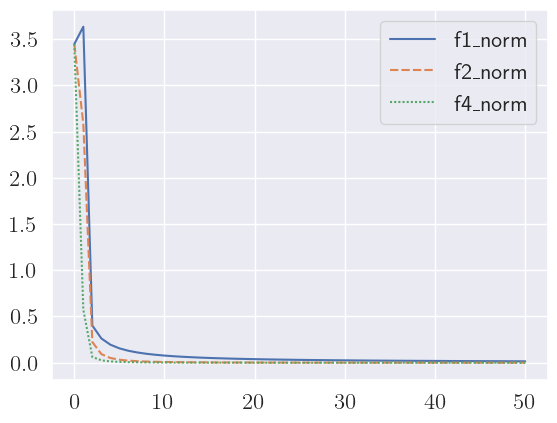

In [82]:
df = plot_frobenius(Gsym, Gskw, Hsym, Hskw, 50)

In [83]:
df

,f1_norm,f2_norm,f4_norm
0,3.445875,3.445875,3.445875
1,3.633468,2.582540,0.573331
2,0.401842,0.223708,0.061973
3,0.262358,0.093120,0.025869
4,0.194998,0.051274,0.014266
5,0.155330,0.032500,0.009050
6,0.129143,0.022453,0.006255
7,0.110543,0.016445,0.004583
8,0.096641,0.012565,0.003502
9,0.085853,0.009914,0.002764


In [87]:
taylor_series_matrix(exp, t * mtrx_prod1(Gsym, Gskw, Hsym, Hskw, 4), 0, 3)

Matrix([
[ 1 - 1.21881428194353*t + 0.742754126934761*t**2 + O(t**3), 1 + 0.718844370310731*t + 0.258368614363716*t**2 + O(t**3)],
[1 - 0.598502894464191*t + 0.179102857341007*t**2 + O(t**3),   1 - 1.49305753351921*t + 1.11461039919923*t**2 + O(t**3)]])

In [88]:
taylor_series_matrix(exp, t * mtrx_prod2(Gsym, Gskw, Hsym, Hskw, 4), 0, 3)

Matrix([
[ 1 - 1.32741448067578*t + 0.881014601753877*t**2 + O(t**3), 1 + 0.61547741522574*t + 0.189406224326479*t**2 + O(t**3)],
[1 - 0.669791543352809*t + 0.224310355773469*t**2 + O(t**3), 1 - 1.38445733478696*t + 0.958361055922704*t**2 + O(t**3)]])

# Explanation

The expression we have in $\Delta_{1}n$ looks to be $\mathcal{O}(1) - \mathcal{O}(\frac{1}{n})$, whereas the expression we have in $\Delta_{2}n$ looks to be $\mathcal{O}(1) - \mathcal{O}(\frac{1}{n^{2}})$